In [1]:
import sys
sys.path.append("/home/adityas/UGA/SensorWeb/scripts/Summer2018/code")

from pathlib import Path
import pandas
import matplotlib.pyplot as plotter
import numpy
from scipy.signal import *

Import data loaders and all

In [2]:
from model.data_loader import DataLoader

In [3]:
files = list(Path("../data/hs_nonlinear/").iterdir())
files = sorted(files, key=lambda x: int(str(x).split("/")[-1].split(".")[0].split("_")[-1]))
files[:10]

[PosixPath('../data/hs_nonlinear/run_0.csv'),
 PosixPath('../data/hs_nonlinear/run_1.csv'),
 PosixPath('../data/hs_nonlinear/run_2.csv'),
 PosixPath('../data/hs_nonlinear/run_3.csv'),
 PosixPath('../data/hs_nonlinear/run_4.csv'),
 PosixPath('../data/hs_nonlinear/run_5.csv'),
 PosixPath('../data/hs_nonlinear/run_6.csv'),
 PosixPath('../data/hs_nonlinear/run_7.csv'),
 PosixPath('../data/hs_nonlinear/run_8.csv'),
 PosixPath('../data/hs_nonlinear/run_9.csv')]

Initialize data loader

## Data stats

In [4]:
dataloader = DataLoader(files)

Print some statistics to look at distributions

        cpu      disk   network    energy
0  0.349068  0.031405  0.057403  0.102001
1  0.854683  0.000000  0.000000  0.232537
2  0.977380  0.000000  0.000000  0.264485
3  1.000000  0.000000  0.000000  0.270374
4  0.786332  0.000000  0.018504  0.214829


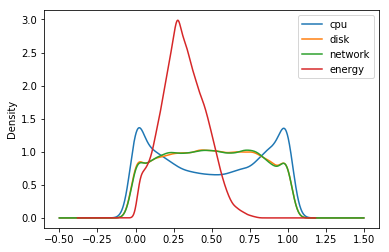

In [5]:
test_data = dataloader[0]
print(test_data.head(5))
test_data.plot(kind="density")
plotter.legend()
plotter.show()

Have a peek at the target function

In [6]:
!head ../scripts/hs_nonlinear.log -n 15

DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
INFO:HighSensitivityNonLinearEM:Energy meter init with factors cpu:0.26037420478250894^1 +disk:0.2615279699043457^2 +net:0.2594535577782813^2
INFO:Device:Device initialised
DEBUG:Device:Device in state compute
DEBUG:Device:Device in state net_send
DEBUG:Device:Device in state read
DEBUG:Device:Device in state compute


Take a look at the waveforms

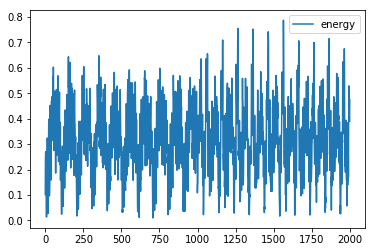

In [8]:
test_data["energy"][:2000].plot()
plotter.legend()
plotter.show()

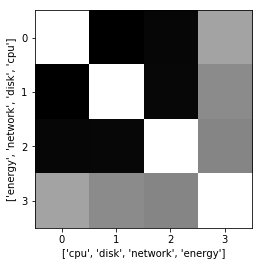

In [10]:
corr = test_data.corr()
plotter.imshow(corr, cmap="gray")
plotter.xticks(numpy.arange(len(corr.columns)))
plotter.yticks(numpy.arange(len(corr.index)))
plotter.xlabel(list(corr.columns))
plotter.ylabel(list(reversed(list(corr.index))))
plotter.show()

Clean up

In [11]:
del test_data

## Learn function

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [13]:
regressor = MLPRegressor(hidden_layer_sizes=(5,), early_stopping=False, activation='logistic')

In [14]:
for i in range(3):
    for batch in range(len(dataloader)):
        data = dataloader[i]
        y = data["energy"]
        X = data.drop("energy", axis=1)
        
        regressor.partial_fit(X, y)
        
        print(f"For epoch {i} batch {batch} score is {mean_absolute_error(y_pred=regressor.predict(X), y_true=y)}")

print(f"Regression coefficients are {regressor.coefs_}")
print(f"Bias {regressor.intercepts_}")

For epoch 0 batch 0 score is 0.10335694200036172
For epoch 0 batch 1 score is 0.08558945730021557
For epoch 0 batch 2 score is 0.06593964412778518
For epoch 0 batch 3 score is 0.04682600515013932
For epoch 0 batch 4 score is 0.03380955934966109
For epoch 0 batch 5 score is 0.028543335220598032
For epoch 0 batch 6 score is 0.027256112557697002
For epoch 0 batch 7 score is 0.026873030187352615
For epoch 0 batch 8 score is 0.026706722972935873
For epoch 0 batch 9 score is 0.02648909659760966
For epoch 0 batch 10 score is 0.02630525593127208
For epoch 0 batch 11 score is 0.026155071511003058
For epoch 0 batch 12 score is 0.026259927886341714
For epoch 0 batch 13 score is 0.025811050488845636
For epoch 0 batch 14 score is 0.02562984028807942
For epoch 0 batch 15 score is 0.02575417076468027
For epoch 0 batch 16 score is 0.025523641278281033
For epoch 0 batch 17 score is 0.02527607383329347
For epoch 0 batch 18 score is 0.024943093173356207
For epoch 0 batch 19 score is 0.02486965250546114
F